# Домашнее задание по машинному обучению №1

#### А. Зависимость цены нарезного хлеба от времени

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as DF
%matplotlib inline

In [259]:
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['text.usetex'] =  True  # How to set True?
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 16

In [46]:
df_bread = pd.read_csv('https://sourceforge.net/p/mvr/code/HEAD/tree/data/WhiteBreadPrices.csv?format=raw')

Загрузим наши данные и сначала просто посмотрим на то, как они устроены.

In [64]:
df_bread.columns = ['Price', 'Time']
df_bread.head()

,Price,Time
0,0.29703,0.005155
1,0.21782,0.010309
2,0.12871,0.015464
3,0.31683,0.020619
4,0.34653,0.025773


In [60]:
df_bread.columns = ['Price', 'Time']
df_bread.tail()

,Price,Time
189,0.34653,0.97938
190,0.61386,0.98454
191,0.34653,0.98969
192,0.32673,0.99485
193,0.51485,1.00000


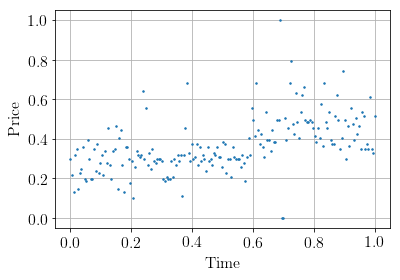

In [381]:
x = np.linspace(0, 1, 194)
y = df_bread['Price']
plt.plot(x, y, '.')

plt.xlabel('Time', fontsize=16, color='black', fontname ='DejaVu Serif')
plt.ylabel('Price', fontsize=16, color='black', fontname ='DejaVu Serif')
plt.grid()
plt.show()

Видим, что это некая случайная величина, скорее всего распределенная нормально и имеющая тенденцию к росту с ростом времени.

Воспользуемся МНК для проведения прямой через эти точки.

Предположим, что модель зависимости это 
$$y_{i} = \omega_{i} + \omega_{2}x_{i} + \epsilon_{i}$$

В нашем случае, зависимой переменной у выступает цена хлеба, а свободной - время.

Тогда, согласно МНК, искомый вектор параметров $$\omega = (\omega_{1}, \omega_{2})^T$$
это просто решения матричного уравнения 
$$\omega = (A^TA)^{-1}A^Ty$$

Нашей матрицей А будет служить матрица, у которой в первом столбце единицы, а во втором - значения х времени.

In [358]:
def gen_feat(df):
    df_len = int(df_bread.shape[0])
    col_1 = np.linspace(1, 1, df_len)
    col_2 = df.Time[:df_len].values
    A = np.vstack([col_1, col_2])
    return A.T

In [359]:
A = gen_feat(df_bread)
w = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
DF(w).tail()

,0
0,0.237797
1,0.253019


In [360]:
y_predict = np.dot(A, w)

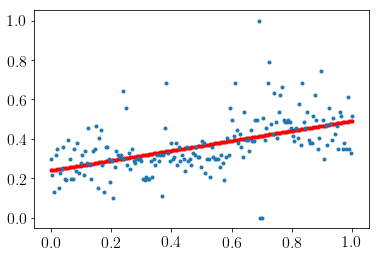

In [361]:
x = np.linspace(0, 1, 194)
plt.scatter(x, y_predict, c='red')
plt.scatter(x, df_bread['Price'])
plt.show()

Теперь посчитаем ошибку (критерий суммы квадратов отклонений от истинных значений) SSE.

In [362]:
err = y - y_predict
SSE_arr = err.T*err
print(SSE_arr.sum())
# DF().tail()

2.7305089025883618


Попробуем вариант полиномиальной регрессии. Добавим фичей до 5-ой степени от времени.

In [367]:
x2 = DF(df_bread.Time.values).apply(lambda x: x**2)
A_new = np.vstack([A.T, x2.T]).T
x3 = DF(df_bread.Time.values).apply(lambda x: x**3)
A_new = np.vstack([A_new.T, x3.T]).T
x4 = DF(df_bread.Time.values).apply(lambda x: x**4)
A_new = np.vstack([A_new.T, x4.T]).T
x5 = DF(df_bread.Time.values).apply(lambda x: x**5)
A_new = np.vstack([A_new.T, x5.T]).T
DF(A_new).tail()

,0,1,2,3,4,5
189,1.0,0.97938,0.959185,0.939407,0.920036,0.901065
190,1.0,0.98454,0.969319,0.954333,0.939579,0.925053
191,1.0,0.98969,0.979486,0.969388,0.959393,0.949502
192,1.0,0.99485,0.989727,0.984629,0.979559,0.974514
193,1.0,1.00000,1.000000,1.000000,1.000000,1.000000


In [368]:
w = np.dot(np.dot(np.linalg.pinv(np.dot(A_new.T, A_new)), A_new.T), y)
DF(w).tail()

,0
1,1.854170
2,-10.374091
3,22.748748
4,-19.539651
5,5.506057


In [369]:
y_new_predict = np.dot(A_new, w)

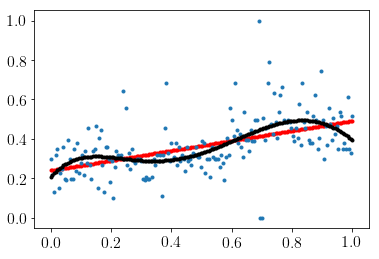

In [386]:
x = np.linspace(0, 1, 194)
plt.scatter(x, y_predict, c='red')
plt.scatter(x, df_bread['Price'])
plt.scatter(x, y_new_predict, c='black')
plt.show()

In [371]:
err = y - y_new_predict
SSE_arr = err.T*err
print(SSE_arr.sum())

2.489105077877997


Как видим, критерий стал поменьше. 